In [7]:
#Import numpy/Pandas
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.mpl_style','default')

#Import Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
sns.set(context="paper", font="monospace")


#Supress Unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

os.chdir('C:\\Users\\princ\\Downloads')
os.listdir()

C:\Users\princ\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


['aws.pem',
 'Data',
 'desktop.ini',
 'No-show-Issue-Comma-300k.csv',
 'Project',
 'tree.dot']

In [5]:
#Import the No-show-Issue-Comma-300k.csv file into Ipython usind pandas
df = pd.read_csv('No-show-Issue-Comma-300k.csv')

In [6]:
#Head to see the top 5 rows and the structure of the dataset
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [7]:
#Tail to see the bottom 5 rows and the structure of the dataset
df.tail()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
299995,41,M,2014-03-24T09:28:22Z,2014-04-16T00:00:00Z,Wednesday,Show-Up,0,0,1,0,0,0,0,1,-23
299996,67,F,2014-11-21T12:00:36Z,2014-11-25T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4
299997,48,F,2014-07-24T15:46:38Z,2014-07-25T00:00:00Z,Friday,No-Show,0,0,0,0,0,1,0,0,-1
299998,5,M,2015-05-15T09:58:50Z,2015-05-21T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,0,-6
299999,0,M,2015-06-12T14:34:25Z,2015-07-15T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1,-33


In [8]:
#Shape to see the overall structure of the dataset. 
#Its shows that the dataset has 300000 rows and 15 columns
df.shape

(300000, 15)

In [9]:
#Shows the Count of Status, Wheather a Show-Up Or No-Show
df['Status'].value_counts().to_frame()

,Status
Show-Up,209269
No-Show,90731


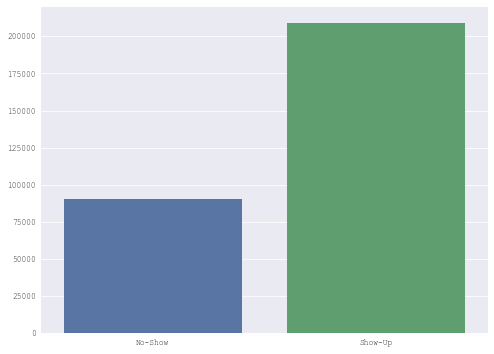

In [10]:
#Barplot of the Status Count
group = df.groupby(['Status'])
gps = group.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = gps.index.tolist(), y = gps.values)
sns.plt.show()

###### The dataset shows that about the 30% of the appointment are "No-Show".

In [11]:
#Grouping the Gender , Smoker, Status and Sms Reminder
#Non-Smoker--0&&Smoker--1||No-SMS-Reminder--0&&SMS-Reminder--1
df.groupby(['Status', 'Gender','Smokes','Sms_Reminder',]).size().to_frame()

0
Status  Gender Smokes Sms_Reminder       
No-Show F      0      0             23459
                      1             32970
                      2               182
               1      0              1400
                      1              1872
                      2                 8
        M      0      0             12994
                      1             15560
                      2                76
               1      0              1062
                      1              1146
                      2                 2
Show-Up F      0      0             56217
                      1             78048
                      2               340
               1      0              2611
                      1              3384
                      2                14
        M      0      0             28796
                      1             35479
                      2               168
               1      0              2008
                      1              2195
                      2                 9

In [12]:
#Grouping the Gender , Status , Diabetes, HiperTension and Alcholism
#No-Diabetes--0&&Diabetes--1||No-HiperTension--0&&HiperTension--1
#Non-Alcholic--0&&Alcholic--1
df.groupby(['Status','Gender','Diabetes','HiperTension',
            'Alcoolism']).size().to_frame()

0
Status  Gender Diabetes HiperTension Alcoolism        
No-Show F      0        0            0           46834
                                     1             803
                        1            0            7847
                                     1             270
               1        0            0             729
                                     1              11
                        1            0            3322
                                     1              75
        M      0        0            0           24693
                                     1             982
                        1            0            2868
                                     1             508
               1        0            0             398
                                     1              41
                        1            0            1223
                                     1             127
Show-Up F      0        0            0          103030
                                     1            1057
                        1            0           23738
                                     1             532
               1        0            0            2030
                                     1              25
                        1            0           10050
                                     1             152
        M      0        0            0           52010
                                     1            1527
                        1            0            8930
                                     1             981
               1        0            0             973
                                     1              90
                        1            0            3822
                                     1             322

In [13]:
#Grouping the Gender , Status , Handicap and Scholarship
#No-Scholarship--0&&Scholarship--1
df.groupby(['Status','Gender','Handcap',
            'Scholarship']).size().to_frame()

0
Status  Gender Handcap Scholarship        
No-Show F      0       0             50615
                       1              8433
               1       0               661
                       1               122
               2       0                44
                       1                14
               3       0                 1
               4       0                 1
        M      0       0             28256
                       1              1859
               1       0               616
                       1                30
               2       0                66
                       1                 4
               3       0                 6
                       1                 2
               4       0                 1
Show-Up F      0       0            122983
                       1             15364
               1       0              1883
                       1               191
               2       0               158
                       1                18
               3       0                 9
                       1                 4
               4       0                 4
        M      0       0             63972
                       1              2921
               1       0              1502
                       1                93
               2       0               132
                       1                13
               3       0                16
                       1                 1
               4       0                 5

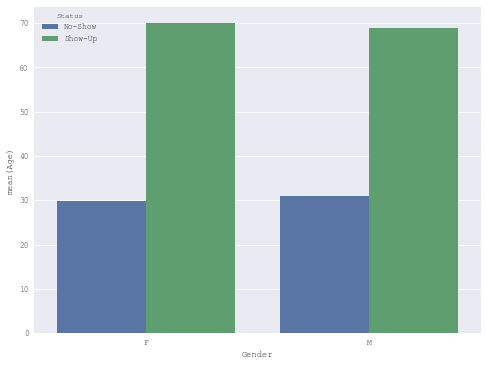

In [63]:
#How does the Status, Age and Gender distributed ?
groups = df[['Gender', 'Status','Age']].groupby(['Gender', 
                                                    'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 *
                                       x / float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact = {}
impact['Gender'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Gender", hue="Status", data=groups)
sns.plt.show()

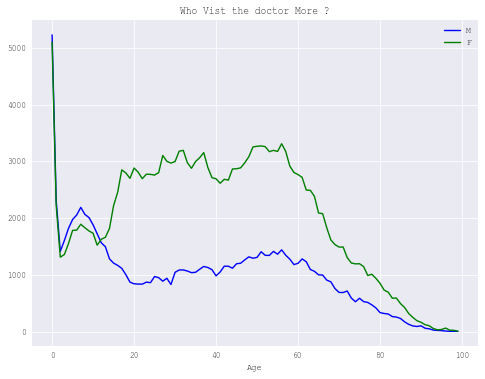

In [13]:
#Predict Who Vist the Doctor More Often
df_1 = df[df.Status == 'Show-Up']
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & 
                                          (df.Gender == 'M')]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & 
                                            (df.Gender == 'F')]))
f,ax = plt.subplots(figsize = (8, 6))
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'g')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.title('Who Vist the doctor More ?')
plt.show()

###### The above analysis shows that Women Visit's the doctor more often then Men.

In [21]:
# Create categories
# We consider Immediate for within 2 days, then within the week, 
# within two weeks, within, the month, within the trimester, 
# within half year and everything above
bins = [-99999, -180, -90, -30, -14, -7, -2, 0]
labels = ["More than half year", "Half year", "Trimester", 
          "Month", "TwoWeeks", "Week", "Immediate"]
wait_period = pd.cut(df.AwaitingTime, bins, labels=labels)
df['Wait_period'] = wait_period

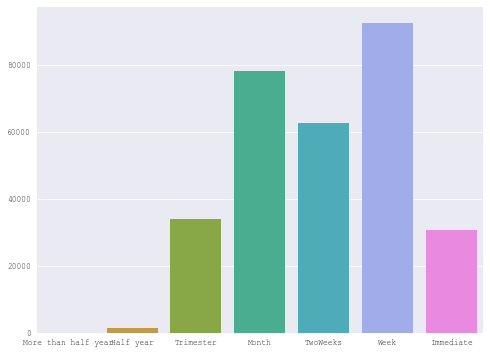

In [22]:
# How does the Wait_Period distribute?
groups = df.groupby(['Wait_period'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

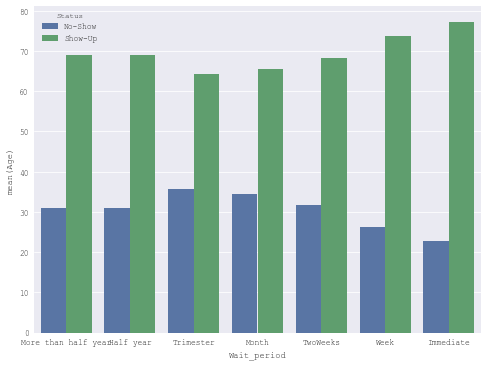

In [62]:
#How does the waiting period distributed in Status, Age and Wait period?
groups = df[['Wait_period', 'Status','Age']].groupby(['Wait_period', 
                                                         'Status']).count()
groups = groups = groups.groupby(level=0).apply(lambda x: 100 * x / float
                                                (x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_1 = {}
impact_1['Wait_period'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Wait_period", hue="Status", data=groups)
sns.plt.show()

###### As there is not much data available for appointment scheduled above a trimester, the results are unlikely to be reliable.

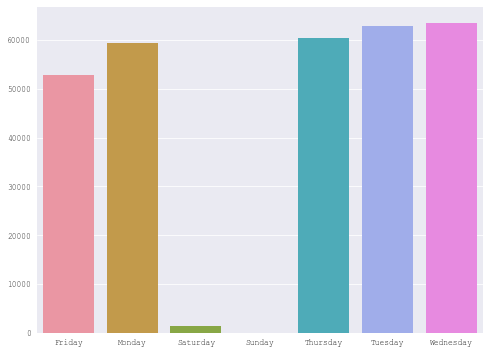

In [24]:
# How does the Day of the week distribute?
groups = df.groupby(['DayOfTheWeek'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

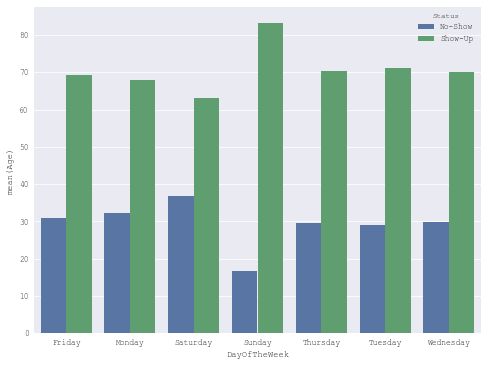

In [61]:
#How does the Day of the Week and Status is distributed in the Week?
groups = df[['DayOfTheWeek', 'Status','Age']].groupby([
        'DayOfTheWeek', 'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x /
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_2 = {}
impact_2['DayOfTheWeek'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="DayOfTheWeek", hue="Status", data=groups)
sns.plt.show()

###### The Weekend days see far less appointments than the other days and it should be considered unreliable as they do have very few data points. The no-show rate is slightly lower during the mid-week days(Tuesday - Thursdays) than it is in Monday or Friday.

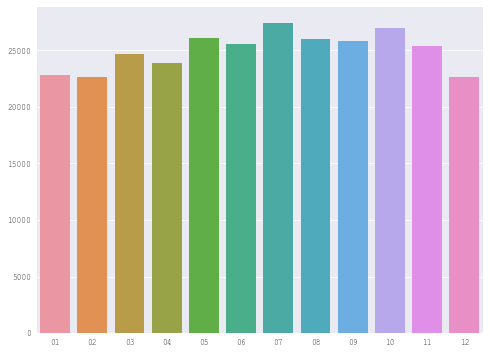

In [26]:
#How does the appointment month distribute?
# Extract the month of the visit
df['Month'] = df['ApointmentData'].apply(lambda x: x[5:7])
groups = df.groupby(['Month'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

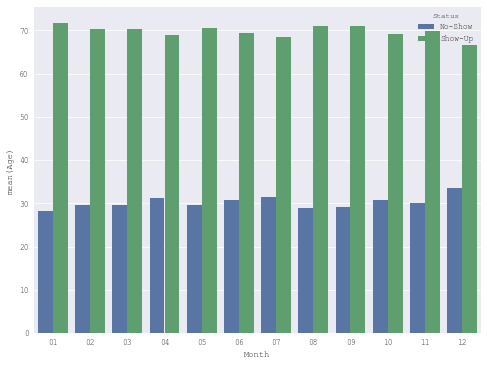

In [60]:
#How doe the appointment month and Status distributed?
groups = df[['Month', 'Status','Age']].groupby(['Month',
                                                   'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x / 
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_3 = {}
impact_3['Month'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Month", hue="Status", data=groups)
sns.plt.show()

###### The data is well-balanced for the months of the appointment. Little Peak in the No-Show-Up around december, april, june and july.

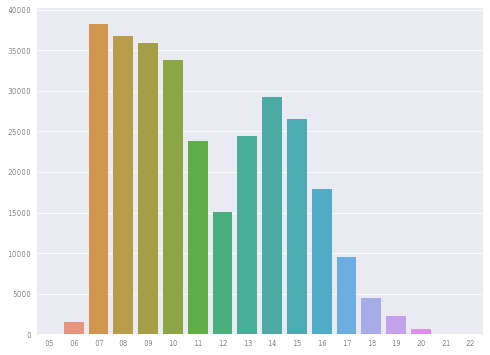

In [28]:
# How does the registration hour distribute?
df['hour'] = df['AppointmentRegistration'].apply(lambda x: x[11:13])
groups = df.groupby(['hour'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

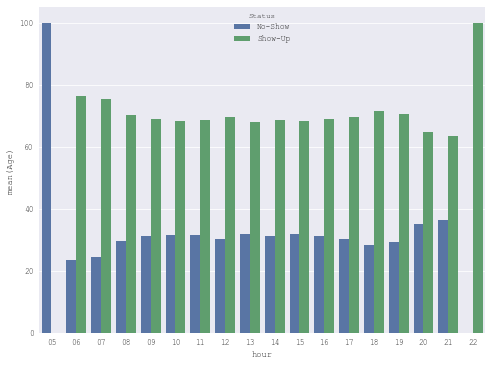

In [59]:
#How does the Registration hour and status distributed?
groups = df[['hour', 'Status','Age']].groupby(['hour', 
                                                       'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x /
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_4 = {}
impact_4['hour'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="hour", hue="Status", data=groups)
sns.plt.show()

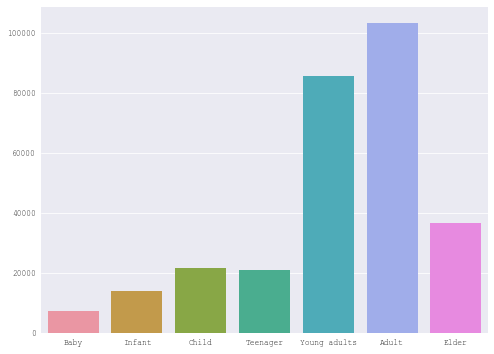

In [30]:
#How does the Age Category distributed?
bins = [0,2,6,12,18,40,65,np.inf]
labels=["Baby","Infant","Child","Teenager","Young adults", "Adult","Elder"]
age_cat = pd.cut(df.Age,bins,labels=labels)
df['Age_cat'] = age_cat

groups = df.groupby(['Age_cat'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

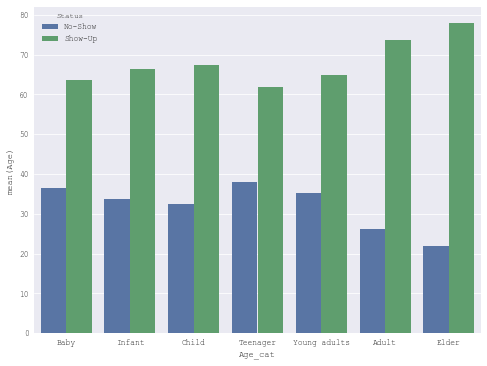

In [58]:
#How does the Age_Category, Age and Status distributed?
groups = df[['Age_cat', 'Status','Age']].groupby(['Age_cat',
                                                     'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x / 
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_5 = {}
impact_5['Age_cat'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Age_cat", hue="Status", data = groups)
sns.plt.show()

###### The only two categories that tend to better than average when it comes to respecting an appointment are the "Adult" and "Elder" categories.

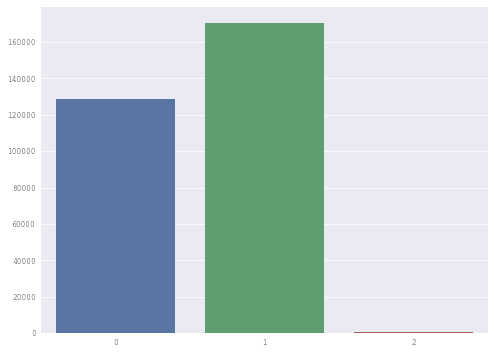

In [32]:
# How does the SMS Reminder distribute?
groups = df.groupby(['Sms_Reminder'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

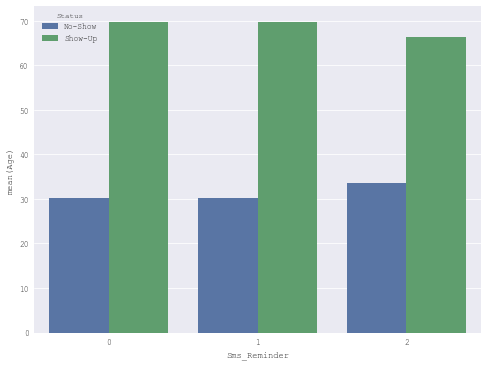

In [56]:
# How does the SMS Reminder, Age and Status distribute?
groups = df[['Sms_Reminder', 'Status','Age']].groupby([
        'Sms_Reminder', 'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x /
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_6 = {}
impact_6['Sms_reminder'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Sms_Reminder", hue="Status", data=groups)
sns.plt.show()

###### It seems that this does not work: the no-show rate is almost the same with or without a reminder.

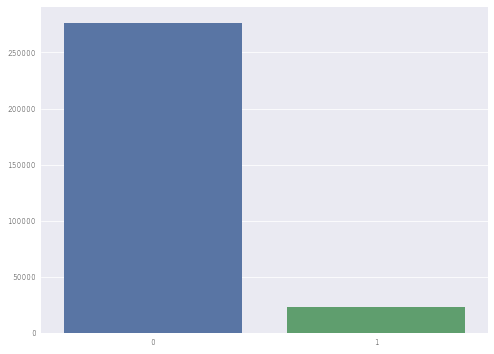

In [34]:
# How does the Diabetes distribute?
groups = df.groupby(['Diabetes'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

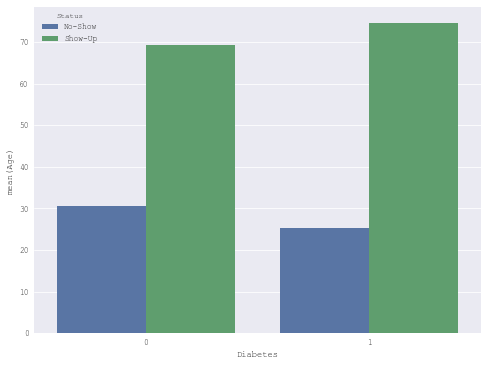

In [54]:
# How do the Diabetes, Age and Status distribtute ?
groups = df[['Diabetes', 'Status','Age']].groupby(['Diabetes',
                                                       'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x /
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_7 = {}
impact_7['Diabetes'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Diabetes", hue="Status", data=groups)
sns.plt.show()

###### Without looking at the data, my opinion is that the attendance will be higher for people suffering from that pathology than for the others. The reason being that diabetics require constant care and monitoring, and that some of the medicine needed is available only through prescription.
###### About 10% of the entries in the dataset corresponds to a diabetic patient. The attendance of that population is better than the average - about 25% of the appointments resulted in a patient not showing up, which is surprisingly high regarding our expectation of diabetics being a lot more conscious about meeting their praticians.

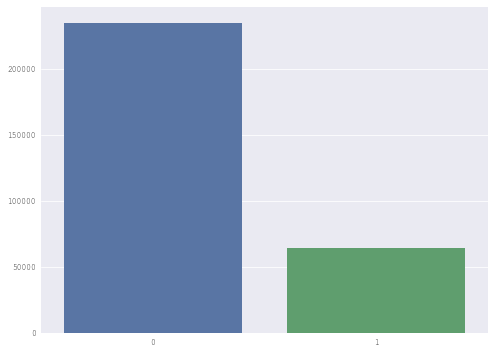

In [36]:
# How does the Diabetes distribute?
groups = df.groupby(['HiperTension'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

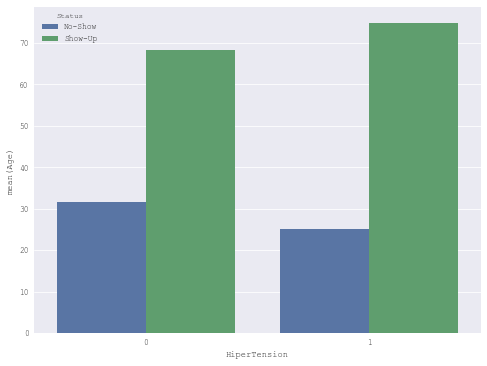

In [53]:
#How does the Diabetes, Age and Status distributed ?
groups = df[['HiperTension', 'Status','Age']].groupby(['HiperTension',
                                                 'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x /
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_8 = {}
impact_8['HiperTension'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="HiperTension", hue="Status", data=groups)
sns.plt.show()

###### Again, a pathology that requires a close monitoring and care, and that requires prescription medicine.About 20% of the appointments in the dataset are related to someone who suffers from it.As for diabetes, the attendance is better than the average, again around 25%.

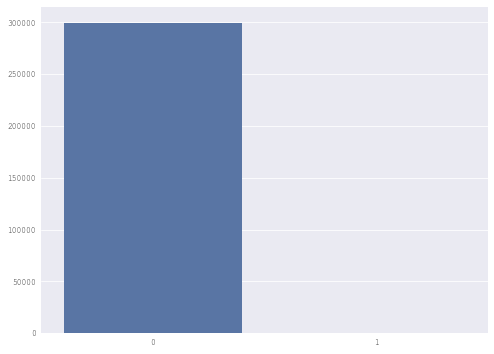

In [39]:
# How does the Tuberculosis distribute?
groups = df.groupby(['Tuberculosis'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

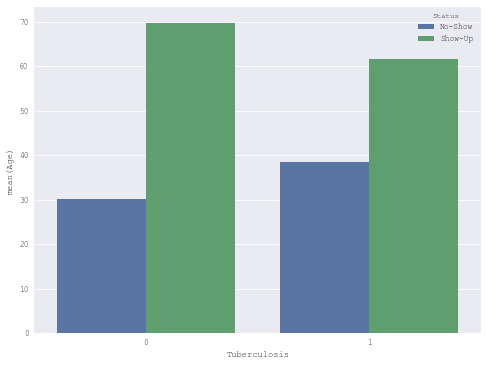

In [52]:
# How does the Tuberculosis, Age and Status distribute ?
groups = df[['Tuberculosis', 'Status','Age']].groupby(['Tuberculosis',
                                                    'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x / 
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_9 = {}
impact_9['Tuberculosis'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Tuberculosis", hue="Status", data=groups)
sns.plt.show()

###### The dataset associated with tuberculosis is very small, only 135 data points, which could be linked to the incidence rate of this disease.Appointments made by patient with Tuberculosis tend to end in a no-show more often than average. This could be due to several things, such as when the patient feels better he does not feel compelled to attend to a follow-up appointment. Another potential explanation is that patients treated for TB die before the follow-up appointment

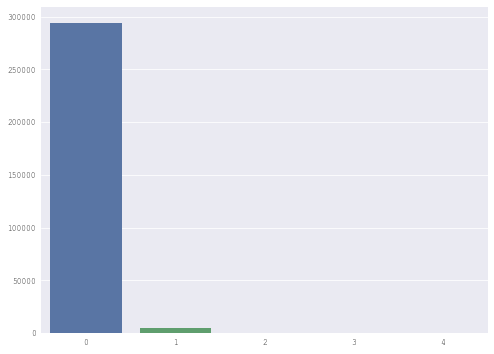

In [41]:
# How does the Handicap distribute?
groups = df.groupby(['Handcap'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

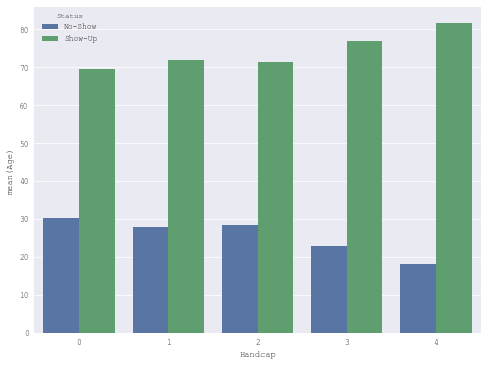

In [50]:
# How does the Handicap, Age and Status distribute ?
groups = df[['Handcap', 'Status','Age']].groupby(['Handcap',
                                                    'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x / 
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_9 = {}
impact_9['Hnadcap'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Handcap", hue="Status", data=groups)
sns.plt.show()

###### This can take values from 0 to 4. The "non 0" values are very few in the dataset, with less than 6,000 data points.For these, the attendance seems to be better than average, with values 3 and 4 not reliable enough to be of use. Later, we will group this into "null handicap" and "non-null handicap".

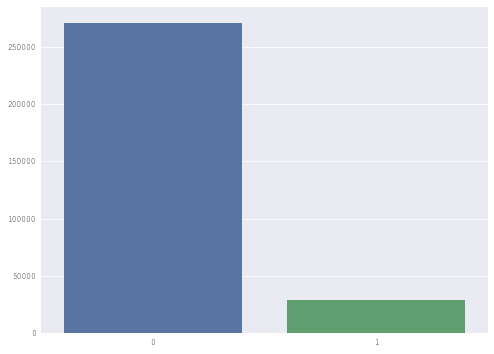

In [96]:
# How does the scholarship distribute?
groups = df.groupby(['Scholarship'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

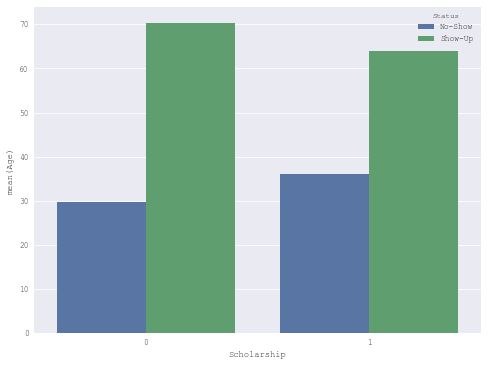

In [51]:
# How does the Scholarship, Age and Status distribute ?
groups = df[['Scholarship', 'Status','Age']].groupby(['Scholarship',
                                                    'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x / 
                                       float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact_9 = {}
impact_9['Scholarship'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Scholarship", hue="Status", data=groups)
sns.plt.show()

###### The proportion of appointment made with alcoholism reported is less than 10%.These appointments are more often ignored than on average.

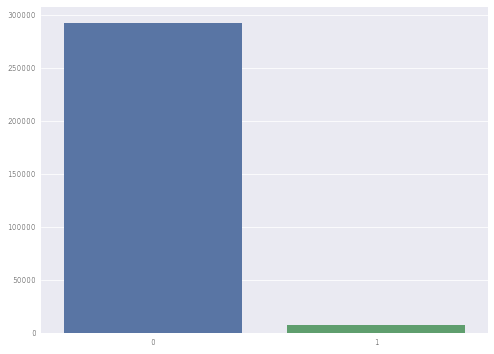

In [45]:
# How does the alcoholism distribute?
groups = df.groupby(['Alcoolism'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

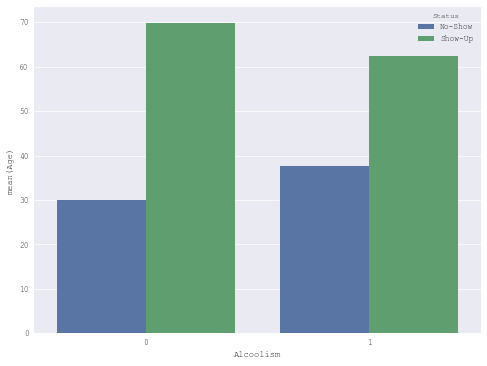

In [66]:
# How does the Scholarship, Age and Status distribute ?
groups = df[['Alcoolism', 'Status','Age']].groupby(['Alcoolism', 'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact['Alcoolism'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Alcoolism", hue="Status", data=groups)
sns.plt.show()

###### The proportion of appointment made with alcoholism reported is less than 10%. These appointments are more often ignored than on average.

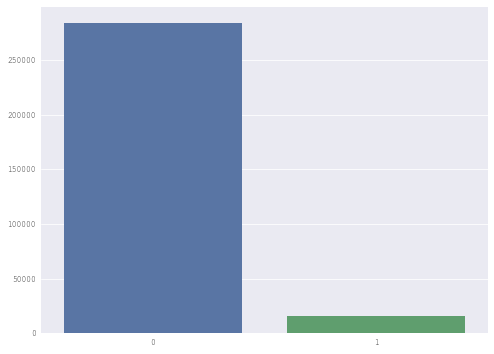

In [65]:
# How does the smoking distribute?
groups = df.groupby(['Smokes'])
gps = groups.size()
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.show()

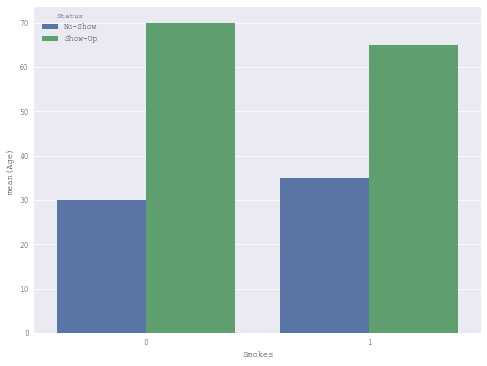

In [69]:
# How does the Smoker, Age and Status distribute ?
groups = df[['Age', 'Status','Smokes']].groupby(['Smokes', 'Status']).count()
groups = groups.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
std = groups.query('Status=="No-Show"')['Age'].std()
impact['Smokes'] = std
f,ax = plt.subplots(figsize = (8, 6))
sns.barplot(y="Age", x="Smokes", hue="Status", data=groups)
sns.plt.show()

###### This is a bit more prevalent than alcoholism - potentially because it is more socially acceptable to smoke than to be alcoholic. The attendance is also worse for the appointments made by patients who reported being smokers than on average.

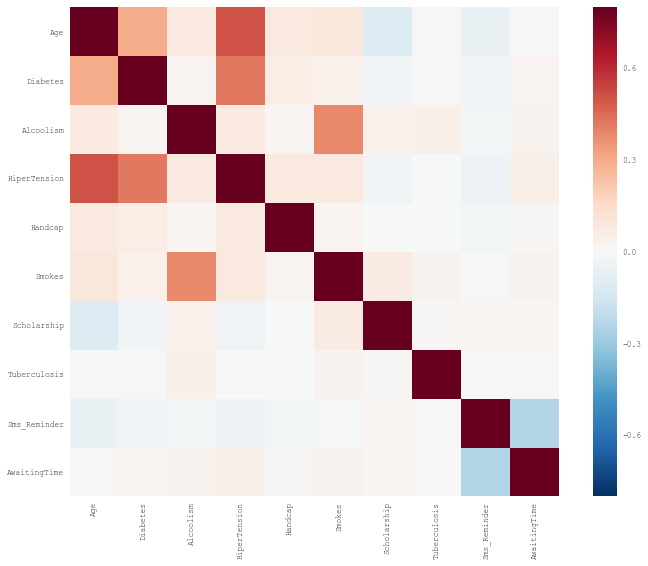

In [198]:
#Heat Map to see the correlation between diffrent variables
#Find the correlation between the different varaibles in the datasets
cormat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(12, 9))

#Draw the heatmap using seaborn
sns.heatmap(cormat, vmax=0.8, square=True)
sns.plt.show()

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [10]:
data = pd.read_csv("No-show-Issue-Comma-300k.csv")
data = pd.get_dummies(data.drop(["AppointmentRegistration", "ApointmentData"], 
                                axis=1)).drop(["Status_No-Show"], axis=1)
y = data["Status_Show-Up"].values
x = data.drop(["Status_Show-Up"], axis=1).values
scaler = StandardScaler()
le = preprocessing.LabelEncoder()
Y = le.fit_transform(y)
X = scaler.fit_transform(x)

In [11]:
# Converting the dataframe into test and train dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.33,
                                                    random_state=1)
names = ['Age', 'Diabetes', 'Alcoolism', 'HiperTension', 'Handcap', 'Smokes',
       'Scholarship', 'Tuberculosis', 'Sms_Reminder', 'AwaitingTime',
       'Gender_F', 'Gender_M', 'DayOfTheWeek_Friday', 'DayOfTheWeek_Monday',
       'DayOfTheWeek_Saturday', 'DayOfTheWeek_Sunday', 'DayOfTheWeek_Thursday',
       'DayOfTheWeek_Tuesday', 'DayOfTheWeek_Wednesday']

rf = RandomForestClassifier()
rfclf = rf.fit(x_train, y_train)
print('Features sorted by their score:')
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),
             reverse = True))


Features sorted by their score:
[(0.52559999999999996, 'Age'), (0.3659, 'AwaitingTime'), (0.018700000000000001, 'Sms_Reminder'), (0.0123, 'HiperTension'), (0.0101, 'Handcap'), (0.0095999999999999992, 'Diabetes'), (0.0082000000000000007, 'Scholarship'), (0.0077000000000000002, 'Smokes'), (0.0055999999999999999, 'Alcoolism'), (0.0053, 'DayOfTheWeek_Friday'), (0.0051000000000000004, 'DayOfTheWeek_Wednesday'), (0.0050000000000000001, 'Gender_M'), (0.0047999999999999996, 'Gender_F'), (0.0047999999999999996, 'DayOfTheWeek_Thursday'), (0.0044999999999999997, 'DayOfTheWeek_Tuesday'), (0.0044999999999999997, 'DayOfTheWeek_Monday'), (0.0016000000000000001, 'DayOfTheWeek_Saturday'), (0.00059999999999999995, 'Tuberculosis'), (0.0, 'DayOfTheWeek_Sunday')]


In [34]:
#Descicion Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train)*100, 2)
print("Decision Tree is %2.2f" %acc_decision_tree)

Decision Tree is 81.91


In [35]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train)*100, 2)
print("Random Forest Classifier is %2.2f" %acc_random_forest)

Random Forest Classifier is 81.91


In [46]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train)* 100, 2)
print("KNeighbours Classifier is %2.2f" %acc_knn)

KNeighbours Classifier is 74.24


In [45]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train)*100, 2)
print("Gausssian Naive Bayes is %2.2f" %acc_gaussian)

Gausssian Naive Bayes is 66.94


In [47]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
print("Linear SVC IS %2.2f" %acc_linear_svc)

Linear SVC IS 69.66


In [48]:
#Base Rate Model
def base_rate_model(x):
    y = np.zeros(x.shape[0])
    return y

y_base_rate = base_rate_model(x_test)
print('Base rate accuracy is %2.2f'% accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.30


In [33]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train)*100, 2)
print("Logistic Regression is %2.2f" %acc_log)

Logistic Regression is 69.64


In [50]:
#Model Comparasion
models = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 'Linear SVC', 
              'Logistic Regression','Naive Bayes'],
    'Score': [acc_random_forest, acc_decision_tree, 
              acc_knn, acc_linear_svc, acc_log, 
              acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,81.91
1,Decision Tree,81.91
2,KNN,74.24
3,Linear SVC,69.66
4,Logistic Regression,69.64
5,Naive Bayes,66.94


In [30]:
#C score to compare the model
print('----Base Model ------')
#Base Rate Auc
base_roc_auc = roc_auc_score(y_test, base_rate_model(x_test))
print('Base Rate AUC = %2.2f' %base_roc_auc)
print(classification_report(y_test, base_rate_model(x_test)))
print('\n-----Logistic Model-----')
#Logistic AUC
logistic_roc_auc = roc_auc_score(y_test, model.predict(x_test))
print('logistic AUC = %2.2f'%logistic_roc_auc)
print(classification_report(y_test, model.predict(x_test)))

----Base Model ------
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.30      1.00      0.46     29752
          1       0.00      0.00      0.00     69248

avg / total       0.09      0.30      0.14     99000


-----Logistic Model-----
logistic AUC = 0.50
             precision    recall  f1-score   support

          0       0.48      0.01      0.01     29752
          1       0.70      1.00      0.82     69248

avg / total       0.63      0.70      0.58     99000



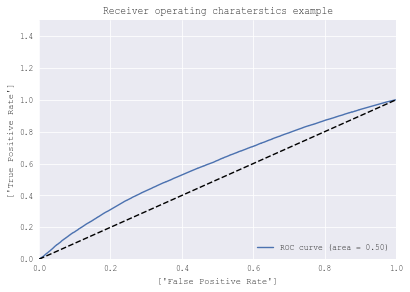

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

#Plot of a ROC Curve for a specific class
plt.figure
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel(['False Positive Rate'])
plt.ylabel(['True Positive Rate'])
plt.title('Receiver operating charaterstics example')
plt.legend(loc = 'lower right')
plt.show()

1. ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
2. You can't actually see the thresholds used to generate the curve on the ROC curve itself



In [119]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [120]:
evaluate_threshold(0.5)

Sensitivity: 0.997328442699
Specificity: 0.00574751277225


In [121]:
evaluate_threshold(0.3)

Sensitivity: 0.999610097043
Specificity: 0.000436945415434


AUC is the percentage of the ROC plot that is underneath the Curve


In [123]:
#Important: first argument is true values, second argument is predicted probabilities
y_pred_prob = model.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob ))

0.588408798499


ROC/AUC advantages:
1. Does not require you to set a classification threshold
2. Still useful when there is high class imbalance



In [128]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(x_test)))

[[  171 29581]
 [  185 69063]]


In [130]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, model.predict(x_test))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [133]:
#Metrics Computed from a confusion matrix
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, model.predict(x_test)))

0.699333333333
0.699333333333


In [136]:
#Classification Error: Overall, how often is the classifier incorrect? 
#Also known as "Misclassification Rate"
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, model.predict(x_test)))

0.300666666667
0.300666666667


In [137]:
#Specificity: When the actual value is negative, how often is the prediction 
#correct? How "Specific" or selective is the classifier when predicting
#positive instances?

print(TN / float(TN + FP))

0.00574751277225


In [138]:
#False Positive Rate: When the actual value is negative, how oftern is the 
#prediction incorrect?

print(FP / float(TN + FP))

0.994252487228


In [140]:
#Precision: When positive value is predicted, how often is the prediction 
#correct? How precise is the classifier when predicting positive instances?

from sklearn.metrics import precision_score
print(TP / float(TP + FP))
print(precision_score(y_test, model.predict(x_test)))

0.700123677061
0.700123677061


Many Others metrics can be computed: F1 Score, Mathews Correlation Coefficient etc.
Conclusion:
1. Confusion matrix gives you a more complete picture of how your classifier is performing
2. Also allows you to compute various classification metrics, and these metrics can guide your model selection